In [1]:
#TensorFlow
import tensorflow as tf
from keras import Input
from keras.src.layers import BatchNormalization
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.python.layers.core import Dense, Dropout


df=pd.read_csv('finalPCA.csv')

X=df.drop(['y'],axis=1)
y=df['y']


x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("x_train.shape:" ,x_train.shape)
print("y_train.shape:" ,y_train.shape)
print("x_test.shape:" ,x_test.shape)
print("y_test.shape:" ,y_test.shape)

2.18.0
x_train.shape: (36168, 18)
y_train.shape: (36168,)
x_test.shape: (9043, 18)
y_test.shape: (9043,)


In [2]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(18,)),

        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
])


C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
r = model.fit(x_train, y_train, batch_size=32, validation_data=(x_test, y_test), epochs=10, )

Epoch 1/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7312 - loss: 306.2060 - val_accuracy: 0.8794 - val_loss: 4.9675
Epoch 2/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7748 - loss: 7.0912 - val_accuracy: 0.8794 - val_loss: 9.2675
Epoch 3/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7838 - loss: 4.3266 - val_accuracy: 0.8794 - val_loss: 1.4907
Epoch 4/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7898 - loss: 1.8477 - val_accuracy: 0.8794 - val_loss: 1.2444
Epoch 5/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8106 - loss: 1.0908 - val_accuracy: 0.8794 - val_loss: 0.3483
Epoch 6/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8643 - loss: 0.4397 - val_accuracy: 0.8794 - val_loss: 0.3408
Epoch 7/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8763 - loss: 0.3791 - val_accuracy: 0.8794 - val_loss: 0.3374
Epoch 8/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8849 - loss: 0.3382 

In [5]:
model.evaluate(x_test, y_test)

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8770 - loss: 0.3302


[0.3257274925708771, 0.8793541789054871]

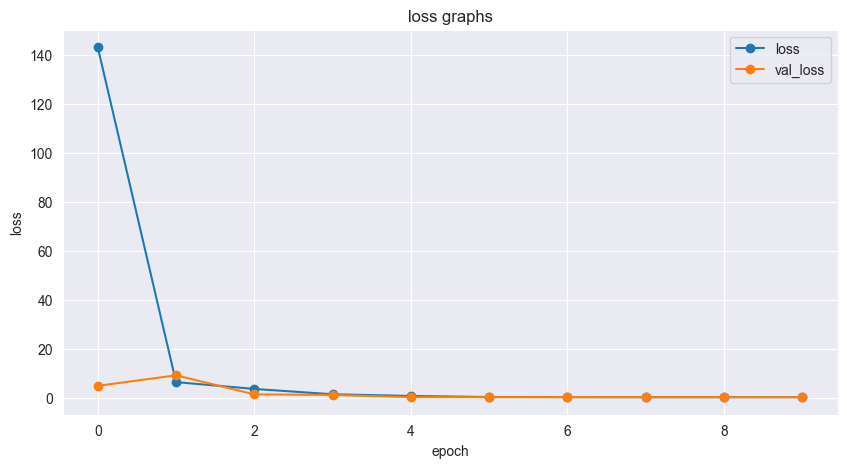

In [6]:
#plot loss
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(r.history['loss'], label='loss', marker='o')
plt.plot(r.history['val_loss'], label='val_loss',marker='o')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title("loss graphs")
plt.legend()
plt.grid(True)
plt.show()

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_model():
    model = Sequential([
        Dense(128, activation='relu', input_dim=18),
        Dense(64, activation='relu'),
        Dense(1, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [35]:
# Example usage
model = build_model()

C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
from scikeras.wrappers import KerasClassifier

keras_classifier = KerasClassifier(build_model())

C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
keras_classifier.fit(x_train, y_train,batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1113/1131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1167 - loss: 0.0000e+00

C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1131/1131 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1167 - loss: 0.0000e+00 - val_accuracy: 0.1206 - val_loss: 0.0000e+00
Epoch 2/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1158 - loss: 0.0000e+00 - val_accuracy: 0.1206 - val_loss: 0.0000e+00
Epoch 3/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1174 - loss: 0.0000e+00 - val_accuracy: 0.1206 - val_loss: 0.0000e+00
Epoch 4/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1136 - loss: 0.0000e+00 - val_accuracy: 0.1206 - val_loss: 0.0000e+00
Epoch 5/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1172 - loss: 0.0000e+00 - val_accuracy: 0.1206 - val_loss: 0.0000e+00
Epoch 6/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1151 - loss: 0.0000e+00 - val_accuracy: 0.1206 - val_loss: 0.0000e+00
Epoch 7/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1178 - loss: 0.0000e+00 - val_accuracy: 0.1206 - val_loss: 0.0000e+00
Epoch 8/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 5s 

C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The KerasClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

KerasClassifier(
	model=<Sequential name=sequential_14, built=True>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [38]:
keras_classifier.score(x_test, y_test)

 79/283 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


0.1206458033838328

In [39]:
from sklearn.model_selection import GridSearchCV
parameter_gride={
    'model__n_hidden': [3,4],
    'model__n_neurons': [64,128],
    'model__learning_rate': [0.01,0.1],
    'model__kernel_initializer': ['he_normal','glorot_normal'],
    'model__add_dropout': [False,True],
    'model__add_batch_normalization': [False,True]
}

keras_classifier=KerasClassifier(build_model,learning_rate=0.01,epochs=10)

grid_search = GridSearchCV(keras_classifier,parameter_gride,cv=3,verbose=2)




In [40]:
grid_search.fit(x_train, y_train)

C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The KerasClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'